In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

### Import Raw Data

In [3]:
data = pd.read_csv("./data/sg_hitch_data.csv", index_col=0)
data.head()

,user,post_date,post_time,raw_message,user_type,pick_up,drop_off,request_date,request_date_normalised,request_time,request_time_normalised,day,number_of_pax
0,∆MBROSEEEEE,21.06.2019,21:47:59,👋 hitcher looking for drivers<br/>pick up: the...,hitcher,the midtown,534044,2019-06-21,2019-06-21,21:47,22:00,friday,3
1,Michelley,21.06.2019,21:48:02,👋 hitcher looking for drivers<br/>pick up: nov...,hitcher,"novena square 2,main entrance near jollibee",valley point,2019-06-21,2019-06-21,21:48,22:00,friday,1
2,Charis Koh,21.06.2019,21:48:19,👋 hitcher looking for drivers<br/>pick up: the...,hitcher,the midtown,534044,2019-06-21,2019-06-21,21:48,22:00,friday,3
3,B-,21.06.2019,21:48:21,👋 hitcher looking for drivers<br/>pick up: mar...,hitcher,marsiling 730175,serangoon gardens,2019-06-21,2019-06-21,21:48,22:00,friday,1
4,Galan,21.06.2019,21:48:58,👋 hitcher looking for drivers<br/>pick up: buk...,hitcher,bukit panjang,tai seng,2019-06-21,2019-06-21,21:48,22:00,friday,2


In [4]:
print("Total number of ride requests: ", len(data))

Total number of ride requests:  295083


Number of hitchers: 	 241366 		Percentage:  81.8 %
Number of drivers: 	 53717 		Percentage:  18.2 %


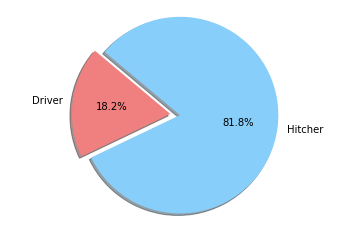

In [11]:
user_type = data['user_type']
user_type_count = Counter(user_type)
print("Number of hitchers: \t", user_type_count['hitcher'], "\t\tPercentage: ", round(user_type_count['hitcher']/len(data)*100, 2), "%")
print("Number of drivers: \t", user_type_count['driver'], "\t\tPercentage: ", round(user_type_count['driver']/len(data)*100, 2), "%")

labels = 'Driver', 'Hitcher'
sizes = [user_type_count['driver'], user_type_count['hitcher']]
colors = ['lightcoral', 'lightskyblue']
explode_driver = 0
explode_hitcher = 0
index = sizes.index(max(sizes))
if index == 0:
    explode_driver = 0.1
else:
    explode_hitcher = 0.1
explode = (explode_driver, explode_hitcher)  # explode max slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [12]:
day_time_frequency = data.groupby(["day", "request_time_normalised"]).size().reset_index(name="count")

In [48]:
monday = day_time_frequency[day_time_frequency.day == "monday"]["count"].tolist()
tuesday = day_time_frequency[day_time_frequency.day == "tuesday"]["count"].tolist()
wednesday = day_time_frequency[day_time_frequency.day == "wednesday"]["count"].tolist()
thursday = day_time_frequency[day_time_frequency.day == "thursday"]["count"].tolist()
friday = day_time_frequency[day_time_frequency.day == "friday"]["count"].tolist()
saturday = day_time_frequency[day_time_frequency.day == "saturday"]["count"].tolist()
sunday = day_time_frequency[day_time_frequency.day == "sunday"]["count"].tolist()

time_intervals = day_time_frequency["request_time_normalised"].unique()
day_intervals = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

In [32]:
print("\t  Mon \t Tue \t Wed \t Thu \t Fri \t Sat \t Sun")
for i in range(48):
    print(time_intervals[i], "\t|", monday[i], "\t", tuesday[i], "\t", wednesday[i], "\t", thursday[i], "\t", friday[i], "\t", saturday[i], "\t", sunday[i])

	  Mon 	 Tue 	 Wed 	 Thu 	 Fri 	 Sat 	 Sun
00:00 	| 1277 	 919 	 892 	 1096 	 1236 	 2071 	 2266
00:30 	| 1231 	 696 	 811 	 919 	 1054 	 2028 	 2348
01:00 	| 1439 	 895 	 884 	 1128 	 1162 	 2657 	 2627
01:30 	| 954 	 588 	 636 	 704 	 865 	 2154 	 2367
02:00 	| 825 	 604 	 580 	 724 	 808 	 2146 	 2369
02:30 	| 595 	 423 	 417 	 642 	 530 	 1443 	 1907
03:00 	| 534 	 519 	 578 	 855 	 630 	 1910 	 1915
03:30 	| 391 	 286 	 371 	 677 	 429 	 1664 	 1633
04:00 	| 335 	 270 	 292 	 433 	 333 	 1495 	 1910
04:30 	| 258 	 202 	 204 	 290 	 256 	 919 	 1410
05:00 	| 291 	 180 	 228 	 266 	 277 	 809 	 1071
05:30 	| 191 	 158 	 116 	 209 	 213 	 518 	 672
06:00 	| 297 	 219 	 245 	 274 	 304 	 589 	 711
06:30 	| 273 	 270 	 209 	 273 	 239 	 377 	 443
07:00 	| 611 	 595 	 529 	 557 	 567 	 455 	 379
07:30 	| 654 	 683 	 533 	 575 	 646 	 347 	 228
08:00 	| 1303 	 1274 	 1234 	 1246 	 1330 	 633 	 371
08:30 	| 1148 	 1145 	 1079 	 1087 	 1081 	 460 	 360
09:00 	| 1058 	 1051 	 1115 	 1022 	 

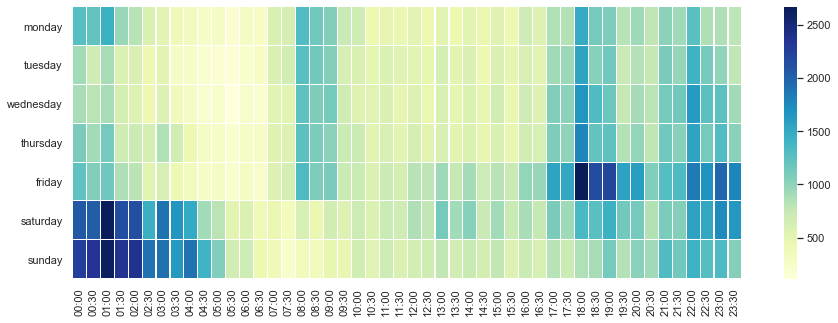

In [72]:
day_time_count_array = [monday, tuesday, wednesday, thursday, friday, saturday, sunday]
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(np.asarray(day_time_count_array), linewidths=0.1, cmap="YlGnBu", xticklabels=time_intervals, yticklabels=day_intervals)

In [97]:
source_destination = []

for i in range(len(pick_up)):
    source_destination.append(str(pick_up[i])+" - "+str(drop_off[i]))

In [98]:
Counter(source_destination).most_common(20)

[('town - anywhere', 407),
 ('yishun - anywhere', 348),
 ('woodlands - anywhere', 320),
 ('yishun - woodlands', 271),
 ('woodlands - yishun', 227),
 ('jurong - anywhere', 216),
 ('tampines - yishun', 214),
 ('tampines - woodlands', 213),
 ('woodlands - town', 204),
 ('woodlands - tampines', 202),
 ('punggol - woodlands', 200),
 ('yishun - town', 190),
 ('tampines - anywhere', 189),
 ('sengkang - woodlands', 185),
 ('bedok - punggol', 177),
 ('pasir ris - yishun', 176),
 ('yishun - tampines', 175),
 ('bedok - hougang', 174),
 ('hougang - yishun', 173),
 ('yishun - hougang', 170)]

In [5]:
pick_up = data['pick_up'].to_list()

In [6]:
count = 0
for pu in pick_up:
    if re.search('\d{6}', str(pu)):
        count += 1
print(count, "/", len(pick_up))

35661 / 295083


In [8]:
Counter(pick_up).most_common(200)

[('woodlands', 6884),
 ('yishun', 6400),
 ('tampines', 5567),
 ('sengkang', 5522),
 ('punggol', 4610),
 ('hougang', 4535),
 ('pasir ris', 4198),
 ('cck', 3547),
 ('amk', 3496),
 ('jurong west', 3357),
 ('bedok', 3003),
 ('jurong', 2666),
 ('bukit batok', 2539),
 ('sembawang', 2525),
 ('bukit panjang', 2360),
 ('town', 1483),
 ('serangoon', 1386),
 ('clarke quay', 1325),
 ('clementi', 1315),
 ('bugis', 1223),
 ('liang court', 1200),
 ('jurong east', 1149),
 ('orchard', 1107),
 ('ntu', 967),
 ('bishan', 943),
 ('toa payoh', 942),
 ('mbs', 898),
 ('yew tee', 767),
 ('ang mo kio', 753),
 ('tanjong pagar', 747),
 ('boon lay', 715),
 ('nus', 707),
 ('choa chu kang', 685),
 ('khatib', 663),
 ('simei', 656),
 ('admiralty', 647),
 ('jewel', 628),
 ('kovan', 616),
 ('changi airport', 609),
 ('geylang', 607),
 ('jurong point', 586),
 ('holland village', 581),
 ('woodland', 580),
 ('yewtee', 575),
 ('tpy', 568),
 ('tiong bahru', 561),
 ('vivo', 558),
 ('ngee ann poly', 557),
 ('marsiling', 535),
 

In [8]:
drop_off = data['drop_off'].to_list()

In [9]:
count = 0
for do in drop_off:
    if re.search('\d{6}', str(do)):
        count += 1
print(count, "/", len(drop_off))

39689 / 295083


In [81]:
Counter(drop_off).most_common(20)

[('anywhere', 7677),
 ('woodlands', 6464),
 ('yishun', 6110),
 ('tampines', 5311),
 ('sengkang', 4901),
 ('punggol', 4642),
 ('hougang', 4405),
 ('pasir ris', 3883),
 ('jurong west', 3303),
 ('amk', 3177),
 ('cck', 3084),
 ('bedok', 2914),
 ('jurong', 2867),
 ('bukit batok', 2330),
 ('sembawang', 2303),
 ('bukit panjang', 2301),
 ('town', 2063),
 ('clementi', 1506),
 ('ngee ann poly', 1296),
 ('serangoon', 1257)]

In [82]:
user = clean_data['user']

In [84]:
Counter(user).most_common(10)

[('Deleted Account', 1610),
 ('J', 1250),
 ('Jonathan Ng', 997),
 ('.', 854),
 ('A', 628),
 ('Elizabeth', 572),
 ('J.K', 536),
 ('Joe', 535),
 ('Ck', 535),
 ('-', 498)]

In [88]:
request_date = data['request_date_normalised']

In [90]:
len(request_date.unique())

252

In [73]:
request_time = data['request_time_normalised']

In [74]:
request_time.unique()

array(['22:00', '21:30', '10:00', '08:00', '09:00', '23:00', '22:30',
       '07:30', '01:00', '14:00', '02:30', '23:30', '06:30', '00:30',
       '09:30', '08:30', '00:00', '12:30', '13:30', '12:00', '04:00',
       '02:00', '05:00', '01:30', '07:00', '11:00', '03:00', '03:30',
       '14:30', '06:00', '04:30', '05:30', '15:30', '16:00', '16:30',
       '17:00', '18:00', '19:00', '17:30', '19:30', '18:30', '20:00',
       '21:00', '20:30', '13:00', '15:00', '10:30', '11:30'], dtype=object)

In [75]:
Counter(request_time).most_common(10)

[('18:00', 11348),
 ('01:00', 10792),
 ('22:00', 10705),
 ('00:00', 9757),
 ('23:00', 9478),
 ('19:00', 9404),
 ('00:30', 9087),
 ('18:30', 9040),
 ('22:30', 8849),
 ('01:30', 8268)]

In [21]:
no_of_pax = clean_data['number_of_pax']

In [22]:
Counter(no_of_pax).most_common(10)

[('1', 185706),
 ('2', 44420),
 ('nil', 12660),
 ('3', 10839),
 ('1-2', 10253),
 ('1-3', 10221),
 ('1-4', 9743),
 ('4', 5937),
 ('5', 753),
 ('1-6', 461)]